>**Name:** Mukesh Kumar

>**Email:** coldperformer@gmail.com

>**Phone:** +91-9781330707

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing & Upgrading Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Processing**](#Section5)<br>
**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
**8.** [**Association Rule Mining**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- **Market Basket Analysis** is one of the key techniques used by large retailers to uncover associations between items. 

- It works by looking for **combinations of items** that occur together frequently in transactions. 

- To put it another way, it allows retailers to **identify relationships** between the items that people buy.

- Association Rules are widely used to **analyze retail basket** or transaction data, and are intended to **identify strong rules**.

- The rules are discovered in transaction data using measures of interestingness, based on the concept of strong rules.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- These days **data** is being **collected** and stored in **massive** amounts.

- Many **industries** are becoming **interested** in mining **patterns** from their databases.

- The **discovery** of interesting **correlation** relationships among **data** can help many business **decision-making** processes.

- These processes include **catalog design**, **cross-marketing**, and customer
shopping behavior **bold text** analysis.

<center><img src="https://pythondata.com/wp-content/uploads/2019/12/1_ZqZCewk1zZOghuIDqsp6VA.png"></center>

**<h4>Scenario (Hypothetical):</h4>**

- **The P Basket**, a **Scotland** based retail shop, sells a variety of a products to its customers.

- Even though they have a pretty good idea which item sells better with which product.

- But still, they are **looking** for a more **controlled** and **accurate solution** that can improve their sales.

- To tackle this situation of crisis, they have **consulted** a team of **data scientists**. **Consider it's you...**

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

- **After installing & upgrading** the libraries, you need to **restart the runtime** to sync the libraries. 

- Make sure not to execute the following cell again after restarting the runtime.

In [ ]:
!pip install -q --upgrade datascience                               # A package that is required by pandas-profiling library
!pip install -q --upgrade pandas-profiling                          # A library to generate basic statistics about data

<a name = Section32></a>
### **3.2 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.1f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborm library for interactive visualization
import networkx as nx                                               # Importing network graph library
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from mlxtend.frequent_patterns import apriori                       # To train apriori model
from mlxtend.frequent_patterns import association_rules             # To get association mining rules from the model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about the customers, transactions, and products of an online retail site.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 541909 | 8 | 22.6 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| InvoiceNo | A 6-digit number uniquely assigned to each transaction. 'C' in the beginning indicates a Cancellation |
|2|StockCode | Product Code, a 5-digit number uniquely assigned to each distinct product |
|3| Description |	Product (item) Name |
|4| Quantity |	The quantities of each product (item) per transaction |
|5| InvoiceDate |	The day and time when each transaction was generated |
|6| UnitPrice |	Product price per unit in Sterling |
|7| CustomerID |	A 5-digit number uniquely assigned to each customer |
|8| Country |	The name of the country where each customer resides |

In [29]:
data = pd.read_excel('https://gitlab.com/coldperformer/multimedia/-/raw/main/analytics-projects/data/04_online_retail.xlsx')
print('Data Shape:', data.shape)
data.head()

Data Shape: (541909, 8)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00        2.5     17850.0  United Kingdom  
1 2010-12-01 08:26:00        3.4     17850.0  United Kingdom  
2 2010-12-01 08:26:00        2.8     17850.0  United Kingdom  
3 2010-12-01 08:26:00        3.4     17850.0  United Kingdom  
4 2010-12-01 08:26:00        3.4     17850.0  United Kingdom

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [30]:
data.describe()

Quantity  UnitPrice  CustomerID
count  541909.0   541909.0    406829.0
mean        9.6        4.6     15287.7
std       218.1       96.8      1713.6
min    -80995.0   -11062.1     12346.0
25%         1.0        1.2     13953.0
50%         3.0        2.1     15152.0
75%        10.0        4.1     16791.0
max     80995.0    38970.0     18287.0

**Observations:**

- We can see the description of only three continuous features - **Quantity**,	**UnitPrice**, and	**CustomerID**.

- The Quantity feature ranges from **-80995 to 80995 units** per transaction.

- The **midspread** (middle 50%) of the feature ranges from **1 unit** to **10 units** per transaction.

- The **UnitPrice** feature ranges from **-11062.06 to 38970 Sterling**. We will have to deal with the **negative price values**.

- The **midspread** (middle 50%) of the feature ranges from **1.25 Sterling to 4.13 Sterling**. 

- Looking at the maximum value of the feature, we can see that either some products are **priced very high** or it may be misinformation.

- **CustomerID** feature is an **identifier** so we won't be making any statistical observations for it. 

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Observations:**

- There are **8 features** with **5,41,908 observations**.

- **Quantity** is of **int64** datatype.

- **UnitPrice** and **CustomerID** are of **float64** datatype.

- **InvoiceDate** is of **datetime64[ns]** datatype.

- **InvoiceNo**, **StockCode**, **Description**, and **Country** are of **object** datatypes

- We will have to make more sense of InvoiceNo and StockCode by exploring them further.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [32]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')

**Observations:**

- There are **8 features** with **5,41,909 observations** in the dataset.

- **1,36,534 (3.1%) cells** have **missing** values.

- Most of the missing values are from the **CustomerID** feature and the rest belong to the **Description** feature.

- **CustomerID** feature has **24.9% of cells missing**.

- Dataset has **76,627 (14.1%) duplicate rows**.

- **Country** and **CustomerID** are highly **correlated** to each other.

- The **UnitPrice** feature is **positively skewed**.

- It also contains **2 negative values** and **2515 (0.5%) zeros**.

- InvoiceNo, StockCode, and Description seem to have unsupported data types.

- The dataset has **4372 unique customers** and **3684 unique products**.

- The **UK** has the **highest amount of customers** followed by Germany, France, and 34 more countries.

<a name = Section52></a>
### **5.2 Data Cleaning**

In [33]:
# We will start by first removing the duplicate rows
data.drop_duplicates(inplace=True)

# Dropping rows containing missing values
data.dropna(inplace=True)

# Display top 5 records
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00        2.5     17850.0  United Kingdom  
1 2010-12-01 08:26:00        3.4     17850.0  United Kingdom  
2 2010-12-01 08:26:00        2.8     17850.0  United Kingdom  
3 2010-12-01 08:26:00        3.4     17850.0  United Kingdom  
4 2010-12-01 08:26:00        3.4     17850.0  United Kingdom

In [34]:
data['InvoiceDate'] = data['InvoiceDate'].astype('str')
value = data['InvoiceDate'].str.split(' ', n=1, expand=True)
data['Date'] = value[0]
data['Time'] = value[1]
data.drop('InvoiceDate', axis=1, inplace=True)
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  CustomerID         Country        Date      Time  
0        2.5     17850.0  United Kingdom  2010-12-01  08:26:00  
1        3.4     17850.0  United Kingdom  2010-12-01  08:26:00  
2        2.8     17850.0  United Kingdom  2010-12-01  08:26:00  
3        3.4     17850.0  United Kingdom  2010-12-01  08:26:00  
4        3.4     17850.0  United Kingdom  2010-12-01  08:26:00

<a name = Section53></a>
### **5.3 Post Profiling Report**

In [35]:
# profile = ProfileReport(df=data, minimal=True)
# profile.to_file(output_file='Post Profiling Report.html')

**Observations**:

- There are **no missing values** in the dataset.

- There are **no duplicate values** in the dataset.

- **Description** feature shows **high cardinality**.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question:** How to verify for cancelled transactions?</h4>

- According to Section 4, feature descreption table, a cancelled transaction can be identified if the InvoiceNo begins with a 'C'

In [36]:
# Putting cancelled orders in a different dataframe for easier analysis
cancelled_orders = data[data['InvoiceNo'].astype(str).str.startswith('C')]

print('Total number of cancelled orders:',cancelled_orders.shape[0])
cancelled_orders.head()

Total number of cancelled orders: 8872


InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

     UnitPrice  CustomerID         Country        Date      Time  
141       27.5     14527.0  United Kingdom  2010-12-01  09:41:00  
154        4.7     15311.0  United Kingdom  2010-12-01  09:49:00  
235        1.6     17548.0  United Kingdom  2010-12-01  10:24:00  
236        0.3     17548.0  United Kingdom  2010-12-01  10:24:00  
237        0.3     17548.0  United Kingdom  2010-12-01  10:24:00

**<h4>Question:** Does the Quantity feature consists of negative values for cancelled orders?</h4>

In [37]:
cancelled_orders[cancelled_orders['Quantity'] >= 0].shape

(0, 9)

**Observations**:

- Our assumption seems true.

- We will **cross-check** this by **checking negative values** in Quantity feature in the entire dataset for **invoice numbers** that **don't start** with '**C**'.

In [38]:
data[(data['Quantity']<0) & (data['InvoiceNo'] != data['InvoiceNo'].astype(str).str.startswith('C'))].shape

(8872, 9)

**Observations**:

- We can conclude that a **negative value** in the **quantity** feature **indicates** a **cancelled order**.

**<h4>Question**: How many total orders have been made?</h4>

In [39]:
total = data['InvoiceNo'].nunique()
total

22190

**<h4>Question:** What is the proportion of cancelled transactions from total number of transactions?</h4>

In [40]:
cancelled = cancelled_orders['InvoiceNo'].nunique()
print('Proportion of cancelled orders is: ' + str(cancelled*100/total) + '%')

Proportion of cancelled orders is: 16.466876971608833%


**<h4>Question :** What is the average number of orders placed per customer?</h4>

In [41]:
groupby_customers = pd.DataFrame(data.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

InvoiceNo
CustomerID           
12346.0             2
12347.0             7
12348.0             4
12349.0             1
12350.0             1

In [42]:
groupby_customers.describe()

InvoiceNo
count     4372.0
mean         5.1
std          9.3
min          1.0
25%          1.0
50%          3.0
75%          5.0
max        248.0

**Observations:**

- At an average, every customer has placed around **5 orders** on the website.

- We will examine further how products are purchased.

**<h4>Question:** Which top 30 products are most bought in UK?</h4>

In [43]:
data = data[data['Country']=='United Kingdom']
print('Data Shape:', data.shape)
data.head()

Data Shape: (356728, 9)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  CustomerID         Country        Date      Time  
0        2.5     17850.0  United Kingdom  2010-12-01  08:26:00  
1        3.4     17850.0  United Kingdom  2010-12-01  08:26:00  
2        2.8     17850.0  United Kingdom  2010-12-01  08:26:00  
3        3.4     17850.0  United Kingdom  2010-12-01  08:26:00  
4        3.4     17850.0  United Kingdom  2010-12-01  08:26:00

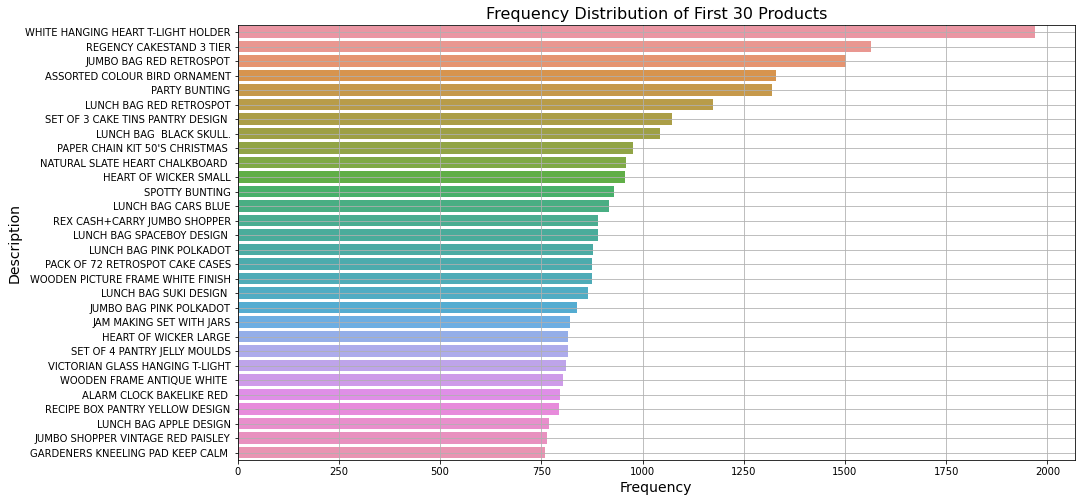

In [44]:
fig = plt.figure(figsize=[15, 8])
sns.countplot(y='Description', data=data, order=data['Description'].value_counts().iloc[:30].index)
plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Description', size=14)
plt.title('Frequency Distribution of First 30 Products', size=16)
plt.grid(b=True)
plt.show()

- The motive of this case study is not to deep dive into analysis but generate association rules.

- So, we will halt the EDA and move on to prepare data for association rule mining algorithms.

<a name = Section7></a>

---
# **7. Post Data Processing**
---

<a name = Section71></a>
### **7.1 Data Transformation**

- In this section, we will transform the data according to the model requirement.

In [49]:
basket_UK = data[data['Country'] == "United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index()
basket_UK = (basket_UK.fillna(0).set_index('InvoiceNo'))
basket_UK.head()

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                  0.0                             0.0   
536366                                  0.0                             0.0   
536367                                  0.0                             0.0   
536368                                  0.0                             0.0   
536369                                  0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                      0.0                           0.0   
536366                      0.0                           0.0   
536367                      0.0                           0.0   
536368                      0.0                           0.0   
536369                      0.0                           0.0   

Description   NINE DRAWER OFFICE TIDY   OVAL WALL MIRROR DIAMANTE   \
InvoiceNo                                                            
536365                            0.0                          0.0   
536366                            0.0                          0.0   
536367                            0.0                          0.0   
536368                            0.0                          0.0   
536369                            0.0                          0.0   

Description   RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON   \
InvoiceNo                                                                 
536365                            0.0                               0.0   
536366                            0.0                               0.0   
536367                            0.0                               0.0   
536368                            0.0                               0.0   
536369                            0.0                               0.0   

Description   SPACEBOY BABY GIFT SET   TOADSTOOL BEDSIDE LIGHT   \
InvoiceNo                                                         
536365                           0.0                        0.0   
536366                           0.0                        0.0   
536367                           0.0                        0.0   
536368                           0.0                        0.0   
536369                           0.0                        0.0   

Description   TRELLIS COAT RACK  10 COLOUR SPACEBOY PEN  \
InvoiceNo                                                 
536365                      0.0                     0.0   
536366                      0.0                     0.0   
536367                      0.0                     0.0   
536368                      0.0                     0.0   
536369                      0.0                     0.0   

Description  12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
InvoiceNo                                                            
536365                              0.0                        0.0   
536366                              0.0                        0.0   
536367                              0.0                        0.0   
536368                              0.0                        0.0   
536369                              0.0                        0.0   

Description  12 EGG HOUSE PAINTED WOOD  12 HANGING EGGS HAND PAINTED  \
InvoiceNo                                                              
536365                             0.0                           0.0   
536366                             0.0                           0.0   
536367                             0.0                           0.0   
536368                             0.0                           0.0   
536369                             0.0                           0.0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                   

<a name = Section72></a>
### **7.2 Data Encoding**

- In this section, we will encode the data according to the model requirement.

In [50]:
UK_basket_encoded = basket_UK.applymap(lambda x: 0 if x < 1 else 1)
print('Encoded Data Shape:', UK_basket_encoded.shape)
UK_basket_encoded.head()

Encoded Data Shape: (19857, 3860)


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                             0   

Description   NINE DRAWER OFFICE TIDY   OVAL WALL MIRROR DIAMANTE   \
InvoiceNo                                                            
536365                              0                            0   
536366                              0                            0   
536367                              0                            0   
536368                              0                            0   
536369                              0                            0   

Description   RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON   \
InvoiceNo                                                                 
536365                              0                                 0   
536366                              0                                 0   
536367                              0                                 0   
536368                              0                                 0   
536369                              0                                 0   

Description   SPACEBOY BABY GIFT SET   TOADSTOOL BEDSIDE LIGHT   \
InvoiceNo                                                         
536365                             0                          0   
536366                             0                          0   
536367                             0                          0   
536368                             0                          0   
536369                             0                          0   

Description   TRELLIS COAT RACK  10 COLOUR SPACEBOY PEN  \
InvoiceNo                                                 
536365                        0                       0   
536366                        0                       0   
536367                        0                       0   
536368                        0                       0   
536369                        0                       0   

Description  12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
InvoiceNo                                                            
536365                                0                          0   
536366                                0                          0   
536367                                0                          0   
536368                                0                          0   
536369                                0                          0   

Description  12 EGG HOUSE PAINTED WOOD  12 HANGING EGGS HAND PAINTED  \
InvoiceNo                                                              
536365                               0                             0   
536366                               0                             0   
536367                               0                             0   
536368                               0                             0   
536369                               0                             0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                   

<a name = Section8></a>

---
# **8. Association Rule Mining**
---

In [56]:
frq_items = apriori(df=UK_basket_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(df=frq_items, metric="lift", min_threshold=1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print('Total Rules Mined:', rules.shape)
rules.head()

Total Rules Mined: (34, 9)


antecedents  \
4       (PINK REGENCY TEACUP AND SAUCER)   
7      (GREEN REGENCY TEACUP AND SAUCER)   
2   (GARDENERS KNEELING PAD CUP OF TEA )   
6     (ROSES REGENCY TEACUP AND SAUCER )   
30    (RED HANGING HEART T-LIGHT HOLDER)   

                             consequents  antecedent support  \
4      (GREEN REGENCY TEACUP AND SAUCER)                 0.0   
7     (ROSES REGENCY TEACUP AND SAUCER )                 0.0   
2    (GARDENERS KNEELING PAD KEEP CALM )                 0.0   
6      (GREEN REGENCY TEACUP AND SAUCER)                 0.0   
30  (WHITE HANGING HEART T-LIGHT HOLDER)                 0.0   

    consequent support  support  confidence  lift  leverage  conviction  
4                  0.0      0.0         0.8  26.6       0.0         5.4  
7                  0.0      0.0         0.8  22.8       0.0         4.3  
2                  0.0      0.0         0.7  19.5       0.0         3.6  
6                  0.0      0.0         0.7  22.8       0.0         3.3  
30                 0.1      0.0         0.7   7.0       0.0         2.7

**Visual Analysis of Association Rules**

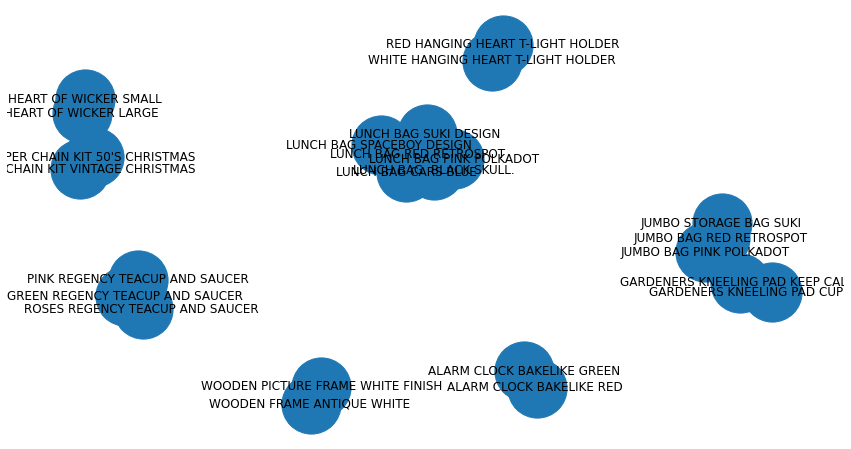

In [57]:
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize=[15, 8])
GA = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
nx.draw(GA,with_labels=True, node_size=3500, font_color='k')

**Reading Notes:**

- **PINK REGENCY TEACUP AND SAUCER** &rarr; **GREEN REGENCY TEACUP AND SAUCER**
> There is 8% confidence that if PINK REGENCY TEACUP AND SAUCER is bought then people will also like to buy GREEN REGENCY TEACUP AND SAUCER in United Kingdom.

- & so on... for rest of the association rules.

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- We almost have **16.46% cancelled orders** which is a slightly high number for an online retailer.

- **Studying** these **cancelled orders** further may help in preventing future cancellation.

- The average **number of unique items per order** are **17**.

- The average revenue per order is **34.39 Sterling** for the online retailer.

- Not only **most sales revenues** are achieved in the **UK**, but also **most customers** are **located** there too.

- Netherlands seems like one of the **bulk buyers** as it has **less than 100 customers** yet brings in the most amount of revenue **outside** the **UK**.

<a name = Section92></a>
### **9.2 Actionable Insights**

- There are a couple of **strategies** that this bakery can **adopt** to increase sales.

- They need to **reconsider** the **allocation** of coffee and its **constituent partners**.

- **Promotional discounts** in either of the **associated items** can entice customers to buy coffee.

- Placing these **items close to the coffee** counter can be a **good strategy** to attract customers.

- **Note:**

    - This was a **fundamental process** of product recommendation that can be used by retail stores.

    - However, in case that you are working with big companies like **Amazon or Netflix**, this technique may not work.

    - The reason being, they collect **massive amounts of data** on which simple model like apriori doesn't perform well.

    - Instead, they use more complicated techniques such as **Collaborative Filtering** and **Content-based filtering**.